In [1]:
import keras
keras.datasets.fashion_mnist.load_data()
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import plotly as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000/") 



In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


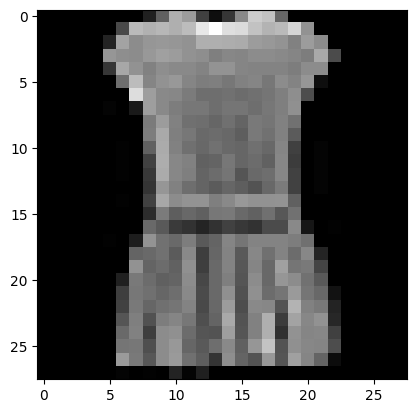

In [3]:
# Essais
plt.plot()
plt.imshow(x_train[3], cmap="gray")
plt.show()

In [4]:
y_train[3]

3

In [7]:
import mlflow
from mlflow import log_metric, log_param, log_artifact
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16

# Taille du noyau utilisée dans le modèle
kernel_size = (3,  3)

# Construire le nom de l'exécution en incluant le kernel_size
run_name = f"Kernel Size: {kernel_size}"

# Démarrer une nouvelle exécution MLflow avec le nom personnalisé
with mlflow.start_run(run_name=run_name):
    # Définir le modèle
    model = Sequential([
        Conv2D(32, kernel_size=kernel_size, activation='relu', input_shape=(28,   28,   1)),
        MaxPooling2D(pool_size=(2,   2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    # Compiler le modèle
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entraîner le modèle
    history = model.fit(x_train, y_train, epochs=10, batch_size=64)
    
    # Enregistrer les métriques d'entraînement
    for epoch in range(len(history.history['accuracy'])):
        log_metric("training_accuracy", history.history['accuracy'][epoch])
        log_metric("training_loss", history.history['loss'][epoch])
    
    # Évaluer le modèle sur le jeu de test
    test_loss, test_acc = model.evaluate(x_test, y_test)
    
    # Enregistrer les métriques de test
    log_metric("test_accuracy", test_acc)
    log_metric("test_loss", test_loss)
    
    # Enregistrer le modèle
    model.save("model.h5")
    log_artifact("model.h5")
    
    # Enregistrer les paramètres du modèle
    log_param("optimizer", "adam")
    log_param("loss", "sparse_categorical_crossentropy")
    log_param("epochs",   10)
    log_param("batch_size",   64)
    log_param("kernel_size", kernel_size)  # Enregistrer le kernel_size comme paramètre

print('Test accuracy:', test_acc)



Epoch 1/10
938/938 [==============================] - 14s 14ms/step - loss: 0.7762 - accuracy: 0.8382
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2784 - accuracy: 0.8977
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2332 - accuracy: 0.9140
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2081 - accuracy: 0.9232
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1913 - accuracy: 0.9291
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1749 - accuracy: 0.9358
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1614 - accuracy: 0.9410
Epoch 8/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1409 - accuracy: 0.9477
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.1359 - accuracy: 0.9511
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3940 

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (60000, 28, 28)